# Exploratory Data Analysis

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [286]:
#download the GVA data
file_path1 ="\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\GunViolenceArchiveDataJan2014toJun2022.csv"

Gun Violence Archive (GVA) is a not for profit corporation formed in 2013 to provide free online public access to accurate information about gun-related violence in the United States. GVA will collect and check for accuracy, comprehensive information about gun-related violence in the U.S. and then post and disseminate it online. We have around 448402 gun incidents in American between 2013 to 2022.

In [287]:
gun_data_raw_df = pd.read_csv(file_path1, encoding= 'unicode_escape')
gun_data_raw_df.shape

(448402, 8)

Let's check and see if there is any missing data.

In [288]:
gun_data_raw_df.isna().sum()

Incident ID            0
Incident Date          0
state                  0
City Or County         0
Address            15443
n_killed               0
n_injured              0
Operations        448277
dtype: int64

Address will not be used in this analysis, and there is too many data missing in the operation column. Let's drop those two columns and also rename some of of the columns as well.

In [289]:
gun_data_raw_df.rename(columns={'Incident Date':'Date','state': 'State','n_killed': 'People Killed','n_injured': 'People Injured' }, inplace=True)
gun_data_df = gun_data_raw_df.drop(['Address','Operations','Incident ID'], axis=1)

# Death by gun incidents in location in 2014-2022

In [290]:
gun_data_df.head()

,Date,State,City Or County,People Killed,People Injured
0,2014-01-01,Florida,Orlando,1,1
1,2014-01-01,Ohio,Cincinnati,1,0
2,2014-01-01,California,Glendale,0,1
3,2014-01-01,Texas,Hebbronville,0,1
4,2014-01-01,New York,Rochester,1,1


Text(0.5, 0, 'Number of People')

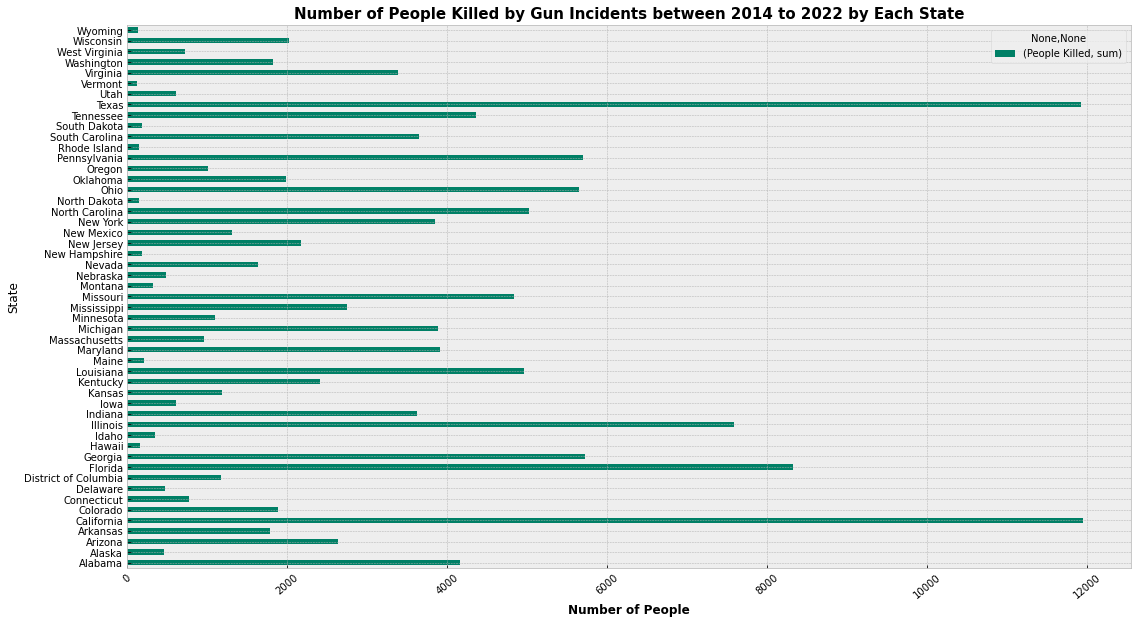

In [291]:
# plot number of people Killed by gun incidents between 2014 to 2022 by each state
plt.style.use('bmh')
order_df = gun_data_df.groupby('State').agg({'People Killed':['sum']}).plot.barh(figsize=(18,10), colormap='summer')
plt.title('Number of People Killed by Gun Incidents between 2014 to 2022 by Each State', weight = "bold", fontsize = 15)
plt.xticks(rotation=40)
plt.xlabel('Number of People', weight = "bold", fontsize = 12)


Californa, Texas, Florida and Illionis are the top 4 states with the most people killed with gun incidents. Let's investigate this a little bit further with popoulation density and income.

#  Death by gun incidents by location and average income in 2017

Let investigate the population data in 2018 https://www.kaggle.com/datasets/lucasvictor/us-state-populations-2018 . Also, poverty data data and annual income data for each state are gathered from this obesity study. https://www.kaggle.com/datasets/annedunn/obesity-and-gdp-rates-from-50-states-in-20142017

In [292]:
gun_data_df.Date = pd.DatetimeIndex(gun_data_df.Date)
state_df = gun_data_df.set_index("Date").groupby([pd.Grouper(freq="Y"), "State"]).sum().reset_index()
state_df

,Date,State,People Killed,People Injured
0,2014-12-31,Alabama,314,560
1,2014-12-31,Alaska,29,48
2,2014-12-31,Arizona,219,215
3,2014-12-31,Arkansas,165,222
4,2014-12-31,California,1303,1565
...,...,...,...,...
454,2022-12-31,Virginia,248,527
455,2022-12-31,Washington,149,247
456,2022-12-31,West Virginia,37,54
457,2022-12-31,Wisconsin,171,433


Population data for each state for 2018, and the first 5 row is shown.

In [293]:
file_path2 ="\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\2019_Census_US_Population_Data.csv"

In [294]:
file_path3 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\2017GDP_Data.csv"

In [295]:
population2018_raw_df = pd.read_csv(file_path2, encoding= 'unicode_escape')
population2018_raw_df.rename(columns={
'STATE':'State','POPESTIMATE2019':'Population'}, inplace=True)
population2018_df = population2018_raw_df.drop(['lat','long'], axis=1)
population2018_df.head()

,State,Population
0,Alabama,4903185
1,Alaska,731545
2,Arizona,7278717
3,Arkansas,3017804
4,California,39512223


Average Income and poverty rate for each state for 2017, and the first 5 row is shown.

In [296]:
obesity_df = pd.read_csv(file_path3, encoding= 'unicode_escape')
abcd=obesity_df.query('Year == 2017')
gdp_df = abcd[['State','Poverty.Rate*100','Average.Income']]
gdp_df.head()

,State,Poverty.Rate*100,Average.Income
3,Alabama,16.89,26471.72046
7,Alaska,11.11,34438.53759
11,Arizona,14.86,29420.61094
15,Arkansas,16.40,25272.81432
19,California,13.30,35128.22756


People that are killed and injured in 2017 from the GVA dataset.

In [297]:
state_2017_raw_df = state_df[(state_df['Date'] > '2017-12-01') & (state_df['Date'] < '2018-5-31')]
state_2017_raw_df['Total Incident'] = state_2017_raw_df['People Killed']+state_2017_raw_df['People Injured']
state_2017_raw_df.head()

C:\Users\eggfr\AppData\Local\Temp\ipykernel_26020\1819508499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_2017_raw_df['Total Incident'] = state_2017_raw_df['People Killed']+state_2017_raw_df['People Injured']


,Date,State,People Killed,People Injured,Total Incident
153,2017-12-31,Alabama,547,859,1406
154,2017-12-31,Alaska,71,68,139
155,2017-12-31,Arizona,289,300,589
156,2017-12-31,Arkansas,215,444,659
157,2017-12-31,California,1427,1951,3378


We will combine all 3 tables into 1 tables, and people killed per population and total incident per population for each state is also calculated. Death per Captia by Gun Inicdentsin 2017 by each state is plotted.

In [298]:
combine_df = pd.merge(population2018_df,gdp_df, left_on ='State',right_on ='State')


Text(0.5, 0, 'Death per Capita per 100K')

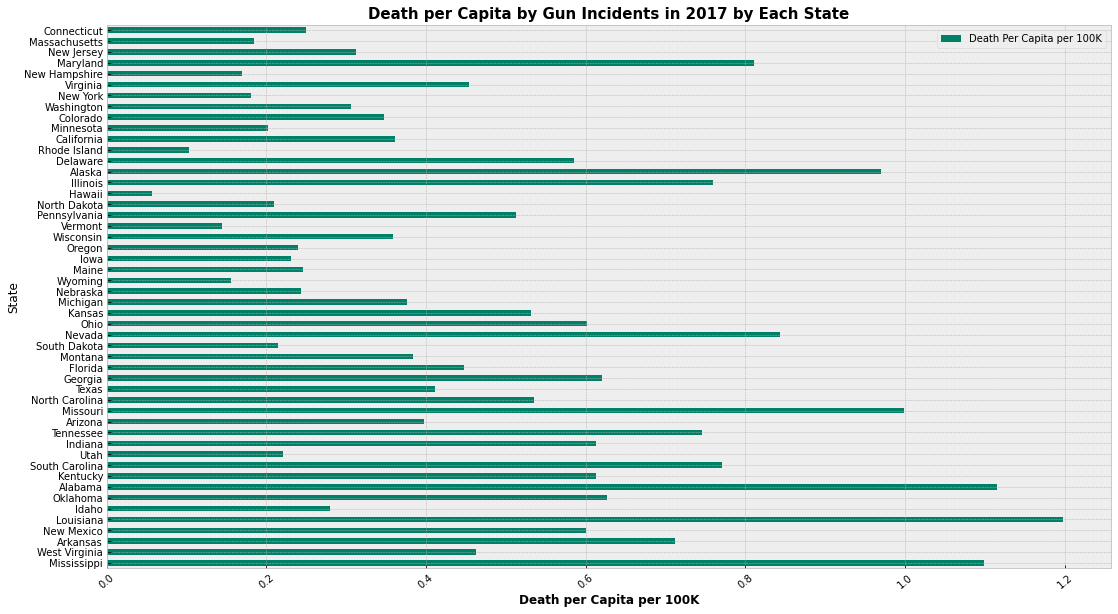

In [299]:
state_2017_df = pd.merge(state_2017_raw_df,combine_df, left_on ='State',right_on ='State')
state_2017_df ['Death Per Capita'] = state_2017_df ['People Killed']/state_2017_df ['Population']
state_2017_df ['Incidents Per Capita'] = state_2017_df ['Total Incident']/state_2017_df ['Population']
state_2017_df['Date'] = pd.DatetimeIndex(state_2017_df['Date']).year
state_2017_df.rename(columns={'Date':'Year'},inplace = True)
state_2017_df['Average.Income']=state_2017_df['Average.Income'].apply(np.ceil)
state_2017_df.sort_values(by='Average.Income', ascending=True, inplace = True)
state_2017_df.head()
state_2017_df ['Death Per Capita per 100K'] = state_2017_df ['Death Per Capita'] *10000 
state_2017_df.to_csv('table_Kill_Per_capita.csv')
state_2017_df.head()
state_2017_df.plot.barh(x='State',y='Death Per Capita per 100K',figsize=(18,10), colormap='summer')
plt.title('Death per Capita by Gun Incidents in 2017 by Each State', weight = "bold", fontsize = 15)
plt.xticks(rotation=40)
plt.xlabel('Death per Capita per 100K', weight = "bold", fontsize = 12)

States with lower average income such as Mississippi, Louisiana have a higher Death per Capita  while higher average income state such as connecticut, massachusetts have a lower Death per Capita,

# Death by gun incidents vs Age group

Let's study study the relationship between death relate to gun incidents and age group with CDC dataset. The following data set is obtained from CDC https://wonder.cdc.gov/controller/datarequest/D76. The deaths from self harm and gun assault incidents from 1999 to 2022. The deaths is then classified into 3 different age groups, <35, 35 to 65 and 65+ for both datas.

In [300]:
file_path3 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\assault_gun_death.csv"

Let's study the relationship between death by assault vs age group.

In [301]:
assault_raw_df = pd.read_csv(file_path3, encoding= 'unicode_escape')
assault_df = assault_raw_df.drop(['Notes','Year Code','Ten-Year Age Groups','State Code'], axis=1)
assault_df['Max_Age'] = assault_df['Ten-Year Age Groups Code'].str.split('-').str.get(1)
assault_df['Max_Age'] = assault_df['Max_Age'].str.replace('May','15')
assault_df[assault_df['Max_Age'] ==""] = np.NaN
assault_df['Max_Age'].fillna(method='ffill',inplace = True)
assault_df.to_csv('asssault_gun_2014_2022.csv')


In [302]:
file_path4 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\asssault_gun_clean.csv"

In [303]:
assault_clear_raw_df = pd.read_csv(file_path4, encoding= 'unicode_escape')
assault_clear_raw_df.head()


,Unnamed: 0,Year,Ten-Year Age Groups Code,State,Deaths,Population,Crude Rate,Max_Age
0,0,1999,14-May,California,36,5246778,0.7,15
1,1,1999,14-May,Florida,18,2069242,Unreliable,15
2,2,1999,14-May,Illinois,17,1823415,Unreliable,15
3,3,1999,14-May,Indiana,12,879493,Unreliable,15
4,4,1999,14-May,Louisiana,12,689702,Unreliable,15


Let's study the relationship between self harm and different age group.

In [304]:
file_path5 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\self_harm.csv"

In [305]:
self_harm_raw_df = pd.read_csv(file_path5, encoding= 'unicode_escape')
self_harm_df = self_harm_raw_df.drop(['Notes','Year Code','Ten-Year Age Groups','State Code'], axis=1)
self_harm_df['Max_Age'] = self_harm_df['Ten-Year Age Groups Code'].str.split('-').str.get(1)
self_harm_df['Max_Age'] = self_harm_df['Max_Age'].str.replace('May','15')
self_harm_df[self_harm_df['Max_Age'] ==""] = np.NaN
self_harm_df['Max_Age'].fillna(method='ffill',inplace = True)
self_harm_df.head()


,Year,Ten-Year Age Groups Code,State,Deaths,Population,Crude Rate,Max_Age
0,1999.0,14-May,Texas,14.0,3251565.0,Unreliable,15
1,1999.0,15-24,Alabama,72.0,633971.0,11.4,24
2,1999.0,15-24,Alaska,17.0,89183.0,Unreliable,24
3,1999.0,15-24,Arizona,55.0,710747.0,7.7,24
4,1999.0,15-24,Arkansas,39.0,379744.0,10.3,24


In [306]:
file_path6 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\self_harm_clean.csv"

In [307]:
self_harm_clear_df = pd.read_csv(file_path6, encoding= 'unicode_escape')
self_harm_clear_df
bins= [0,35,65,85]
labels =['<35','35 to 65','65+']
self_harm_clear_df['Age_Group'] = pd.cut(self_harm_clear_df['Max_Age'], bins=bins, labels=labels, right=False)
self_harm_clear_df.drop(['Unnamed: 0','Max_Age'], axis=1,inplace = True)
self_harm_clear_df.rename(columns={'Deaths':'Self Harm Deaths'},inplace = True)
self_harm_clear_df.head()
self_harm_clear_df.to_csv('self_harm_clean_2014_2022.csv')

In [308]:
self_harm_clear_df.head()

,Year,Ten-Year Age Groups Code,State,Self Harm Deaths,Population,Crude Rate,Age_Group
0,1999,14-May,Texas,14,3251565,Unreliable,<35
1,1999,15-24,Alabama,72,633971,11.4,<35
2,1999,15-24,Alaska,17,89183,Unreliable,<35
3,1999,15-24,Arizona,55,710747,7.7,<35
4,1999,15-24,Arkansas,39,379744,10.3,<35


See the presentation slide for visualization. When we look at deaths realte to gun incidents, we classified the gun death cause in two different groups, by self harm, and by assault. Self harm deaths contributed more deaths than assault deaths, and both groups exhibit an upward trend since year 1998, and both death counts also spiked recently. We also further investigate these incidents into 3 different age groups. Age group between 35-64 is the majority group that contribute for self harm deaths, and all 3 age groups also exhibit upward trends since 1998. Age group < 34 is the majority group for assault gun deaths, and age group between 35-64 also exhibits similar pattern.


# Twitter usage since 2010

Let's take a look at twitter usage since 2010 from the following dataset https://www.kaggle.com/datasets/margarethamartinez/socialmedia2021?select=Social+Media+Users.csv

In [309]:
file_path7 = "\\Users\\eggfr\\Flatiron\\Flatiron_phase4_project\\Gun-Image-Classification\\HC Folder\\data\\Social_Media_Users.csv"

Text(0, 0.5, 'Number of Users')

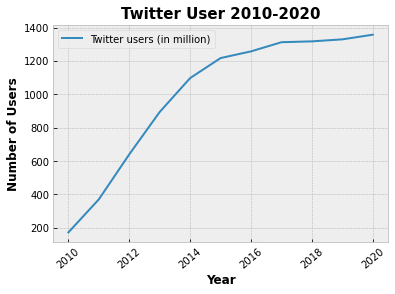

In [310]:
social_media_raw_df = pd.read_csv(file_path7, encoding= 'unicode_escape')
social_media_raw_df.head()
social_media_raw_df['Year'] = (social_media_raw_df['ï»¿'].str.split(' ').str.get(1))

social_media_raw_df.drop(columns=['ï»¿']) 
#social_media_raw_df
social_media_df = social_media_raw_df.groupby(by=["Year"], dropna=True).sum()
#social_media_df 
social_media_df.plot()

plt.title('Twitter User 2010-2020', weight = "bold", fontsize = 15)
plt.xticks(rotation=40)
plt.xlabel('Year', weight = "bold", fontsize = 12)
plt.ylabel('Number of Users', weight = "bold", fontsize = 12)
#social_media_raw_df.plot(figsize=(18,10), colormap='summer')

Twitter users increase significantly since 2010 and the death counts by gun incidents also has a significant uptrend since 2010.

# Time series plot for people killed and injured relate to gun incidents between 2014 to 2022

Let's prepare a time series to see if there is a trend for people killed and injured relate to gun incidents in america between 2014 to 2022

Text(0, 0.5, 'Count')

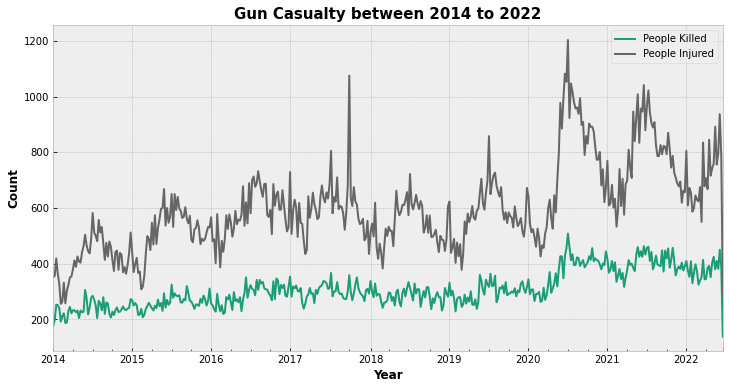

In [311]:
gun_data_time_series_df = gun_data_raw_df.drop(['Address','Operations','Incident ID'], axis=1)
gun_data_time_series_df['Date'] = pd.to_datetime(gun_data_time_series_df['Date'])
gun_data_time_series_df.set_index('Date', inplace=True)
gun_data_time_series_df.rename(columns={'state': 'State','n_killed': 'People Killed','n_injured': 'People Injured' }, inplace=True)
gun_data_time_series_df = gun_data_time_series_df.resample('W').sum()

plt.style.use('bmh')
gun_data_time_series_df.plot(figsize=(12,6), colormap='Dark2')
plt.title('Gun Casualty between 2014 to 2022', weight = "bold", fontsize = 15)
plt.xlabel('Year', weight = "bold", fontsize = 12)
plt.ylabel('Count', weight = "bold", fontsize = 12)

There is an upward trend for people killed, people injurded relate to gun incidents in america between 2014-2022 from the time series plot. 